<a href="https://colab.research.google.com/github/eman-kom/tensorflow-fundamentals/blob/main/05_transfer_learning_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2022-06-06 15:34:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-06 15:34:10 (96.4 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



In [28]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")
walk_through_dir("10_food_classes_10_percent")

--2022-06-06 15:34:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.20.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M   319MB/s    in 0.5s    

2022-06-06 15:34:11 (319 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in 

In [29]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [30]:
import tensorflow as tf

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=(224, 224),
    label_mode="categorical",
    batch_size=32
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=(224, 224),
    label_mode="categorical",
    batch_size=32
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [31]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [32]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(
    include_top=False
)

base_model.trainable = False
inputs = Input(shape=(224, 224, 3), name="input_layer")

x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

x = GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

outputs = Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

history_10_percent = model_0.fit(
    train_data_10_percent,
    epochs=5,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extraction")]
)

Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20220606-153416
Epoch 1/5
24/24 [==============================] - 19s 452ms/step - loss: 1.9878 - accuracy: 0.3160 - val_loss: 1.4430 - val_accuracy: 0.6678
Epoch 2/5
24/24 [==============================] - 7s 243ms/step - loss: 1.1983 - accuracy: 0.7307 - val_loss: 0.9895 - val_accuracy: 0.7812
Epoch 3/5
24/24 [==============================] - 4s 156ms/step - loss: 0.8736 - accuracy: 0.7880 - val_loss: 0.8134 - val_accuracy: 0.7993
Epoch 4/5
24/24 [==============================] - 5s 187ms/step - loss: 0.7140 - accuracy: 0.8347 - val_loss: 0.7176 - val_accuracy: 0.8141
Epoch 5/5
24/24 [==============================] - 4s 157ms/step - loss: 0.6103 - accuracy: 0.8653 - val_loss: 0.6570 - val_accuracy: 0.8322


In [33]:
model_0.evaluate(test_data)

79/79 [==============================] - 8s 90ms/step - loss: 0.6217 - accuracy: 0.8428


[0.6216629147529602, 0.8428000211715698]

In [34]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_8
1 rescaling_7
2 normalization_7
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_d

In [35]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_7 (Rescaling)        (None, None, None,   0           ['input_8[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_7 (Normalization  (None, None, None,   7          ['rescaling_7[0][0]']            
 )                              3)                                                   

In [36]:
model_0.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


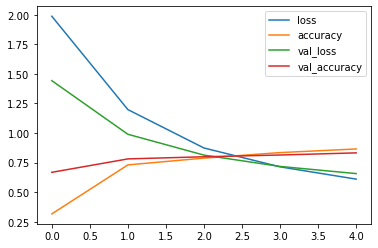

In [37]:
import pandas as pd
pd.DataFrame(history_10_percent.history).plot()

In [38]:
input_shape = (1, 4, 4, 3)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor: {input_tensor.shape}")

global_avg_pooled_tensor = GlobalAveragePooling2D()(input_tensor)
print(f"Global Average Pooled 2D: {global_avg_pooled_tensor.shape}")

Random input tensor: (1, 4, 4, 3)
Global Average Pooled 2D: (1, 3)


In [39]:
tf.reduce_mean(input_tensor, axis=[1,2]) == global_avg_pooled_tensor

<tf.Tensor: shape=(1, 3), dtype=bool, numpy=array([[ True,  True,  True]])>